In [7]:
# MONTH 2
from sklearn import datasets
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import imutils

In [2]:
digits = datasets.load_digits()

In [3]:
# plt.imshow(digits['images'][100],cmap='gray')

# cv2.imshow('jkljk',digits['images'][1])
# cv2.waitKey(0)
# cv2.destroyAllWindows()


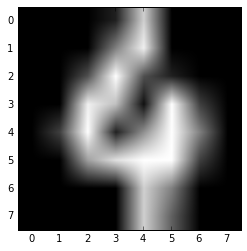

In [15]:
plt.imshow(digits['images'][100], cmap='gray')

In [17]:
T, thresh = cv2.threshold(digits['images'][100], 0, 254, cv2.THRESH_OTSU)

error: /home/i008/opencv/opencv-2.4.10/modules/imgproc/src/thresh.cpp:719: error: (-215) src.type() == CV_8UC1 in function threshold


In [28]:
import numpy as np

ot = cv2.threshold(digits['images'][666].astype("uint8"), 0, 255, cv2.THRESH_OTSU)

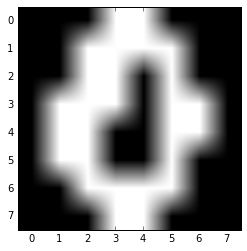

In [29]:
plt.imshow(ot[1],cmap='gray')

# 4.3: k-Nearest Neighbor classification


In [3]:
# import the necessary packages
from __future__ import print_function
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import numpy as np
import imutils
import cv2
 
# load the MNIST digits dataset
mnist = datasets.load_digits()
 
# take the MNIST data and construct the training and testing split, using 75% of the
# data for training and 25% for testing
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data),
    mnist.target, test_size=0.5, random_state=42)
 
# now, let's take 10% of the training data and use that for validation
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
    test_size=0.1, random_state=84)
 
# show the sizes of each data split
print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))

training data points: 808
validation data points: 90
testing data points: 899


In [4]:
# initialize the values of k for our k-Nearest Neighbor classifier along with the
# list of accuracies for each value of k
kVals = range(1, 30, 2)
accuracies = []
 
# loop over various values of `k` for the k-Nearest Neighbor classifier
for k in xrange(1, 30, 2):
    # train the k-Nearest Neighbor classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData, trainLabels)

    # evaluate the model and update the accuracies list
    score = model.score(valData, valLabels)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

# find the value of k that has the largest accuracy
i = np.argmax(accuracies)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
    accuracies[i] * 100))

k=1, accuracy=97.78%
k=3, accuracy=98.89%
k=5, accuracy=97.78%
k=7, accuracy=97.78%
k=9, accuracy=97.78%
k=11, accuracy=98.89%
k=13, accuracy=97.78%
k=15, accuracy=96.67%
k=17, accuracy=95.56%
k=19, accuracy=96.67%
k=21, accuracy=96.67%
k=23, accuracy=95.56%
k=25, accuracy=95.56%
k=27, accuracy=95.56%
k=29, accuracy=95.56%
k=3 achieved highest accuracy of 98.89% on validation data


In [5]:
model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(trainData, trainLabels)
predictions = model.predict(testData)
 
# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits
print("EVALUATION ON TESTING DATA")
print(classification_report(testLabels, predictions))


EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        82
          1       0.97      1.00      0.98        89
          2       0.99      1.00      0.99        83
          3       0.99      0.96      0.97        93
          4       0.99      0.99      0.99        93
          5       0.99      0.98      0.98        99
          6       1.00      1.00      1.00        98
          7       0.96      0.99      0.97        87
          8       0.99      0.98      0.98        83
          9       0.98      0.96      0.97        92

avg / total       0.98      0.98      0.98       899



/home/i008/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/i008/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


I think that digit is: 7
I think that digit is: 9
I think that digit is: 5

/home/i008/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/i008/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)



I think that digit is: 4
I think that digit is: 3


/home/i008/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


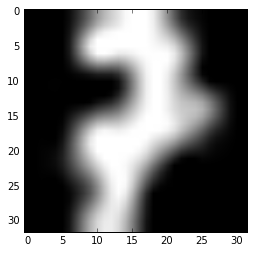

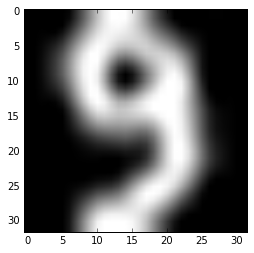

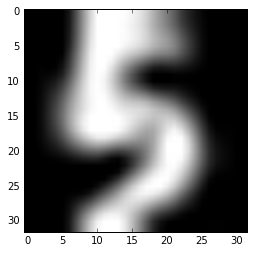

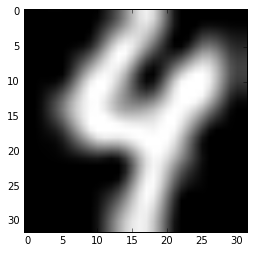

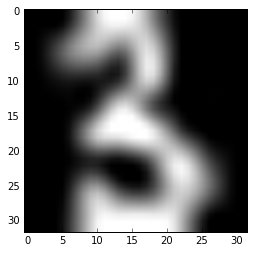

In [8]:
# loop over a few random digits
for i in np.random.randint(0, high=len(testLabels), size=(5,)):
    # grab the image and classify it
    image = testData[i]
    prediction = model.predict(image)[0]

    # convert the image for a 64-dim array to an 8 x 8 image compatible with OpenCV,
    # then resize it to 32 x 32 pixels so we can see it better
    image = image.reshape((8, 8)).astype("uint8")
    image = exposure.rescale_intensity(image, out_range=(0, 255))
    image = imutils.resize(image, width=32, inter=cv2.INTER_CUBIC)

    # show the prediction
    plt.figure()
    print("I think that digit is: {}".format(prediction))
    plt.imshow(image,cmap='gray')
